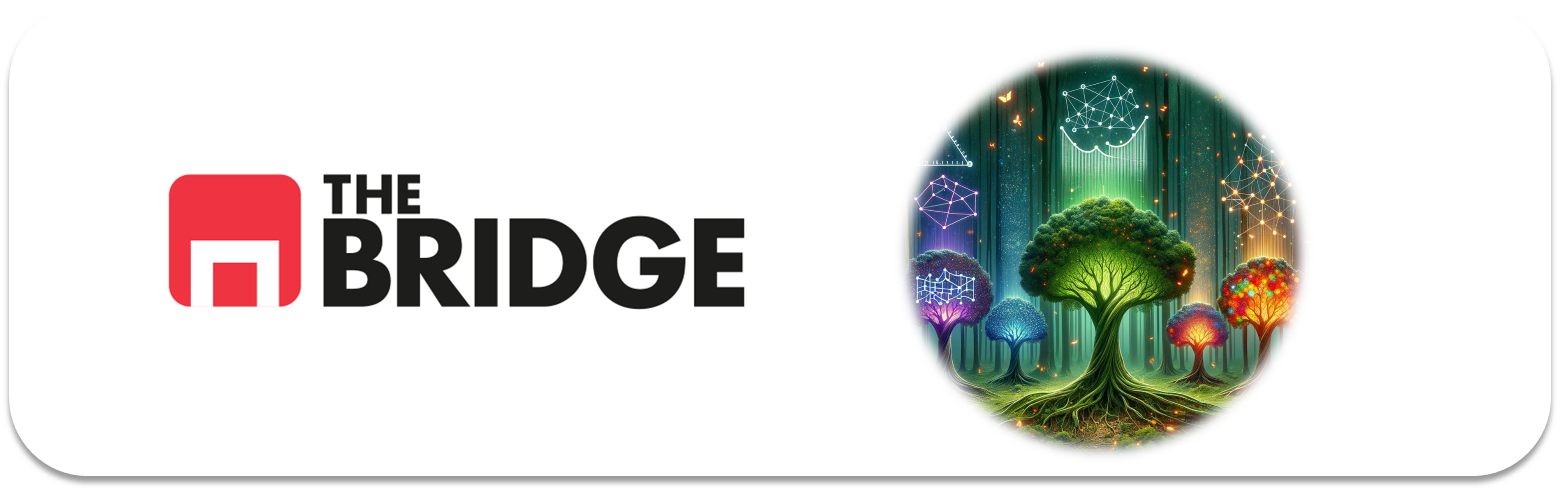

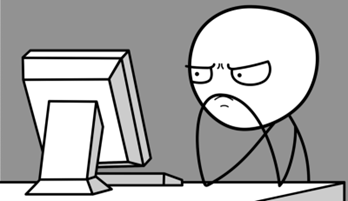

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

import sys
sys.path.append('/Users/aliciamarzoa/Will/the_bridge/personal_projects/stats_help')
import dstoolbox as tlbx


### Ejercicio 1

Importa el csv "temps.csv"

In [2]:
temps_df = pd.read_csv('./data/temps.csv')

### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [3]:
temps_df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
temps_df.year.unique()

array([2016])

In [5]:
temps_df.drop('year', axis=1, inplace=True)

In [6]:
temps_df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [7]:
temps_df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [8]:
temps_df.week.unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [9]:
features_encode = ['month','week']

In [10]:
temps_df = pd.get_dummies(temps_df)
temps_df.head()

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### Ejercicio 3

Divide en train y test

In [11]:
target = temps_df['actual']
data = temps_df.drop('actual', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2)

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [12]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [13]:
pred = dtree.predict(X_test)
errors = abs(pred-y_test)
MAE = errors.mean()
print(f"MAE: {MAE.round(2)} degrees")

MAE: 4.69 degrees


MAPE: 7.34%


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [ ]:
MAPE = np.mean(errors/y_test)*100
print(f"MAPE: {MAPE:.2f}%")

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

print(f"MAPE: {round(mean_absolute_percentage_error(y_test, pred)*100,2)}%")
print(f"MAE: {mean_absolute_error(pred, y_test):.2f}")

### Ejercicio 7

Representa el árbol de decision

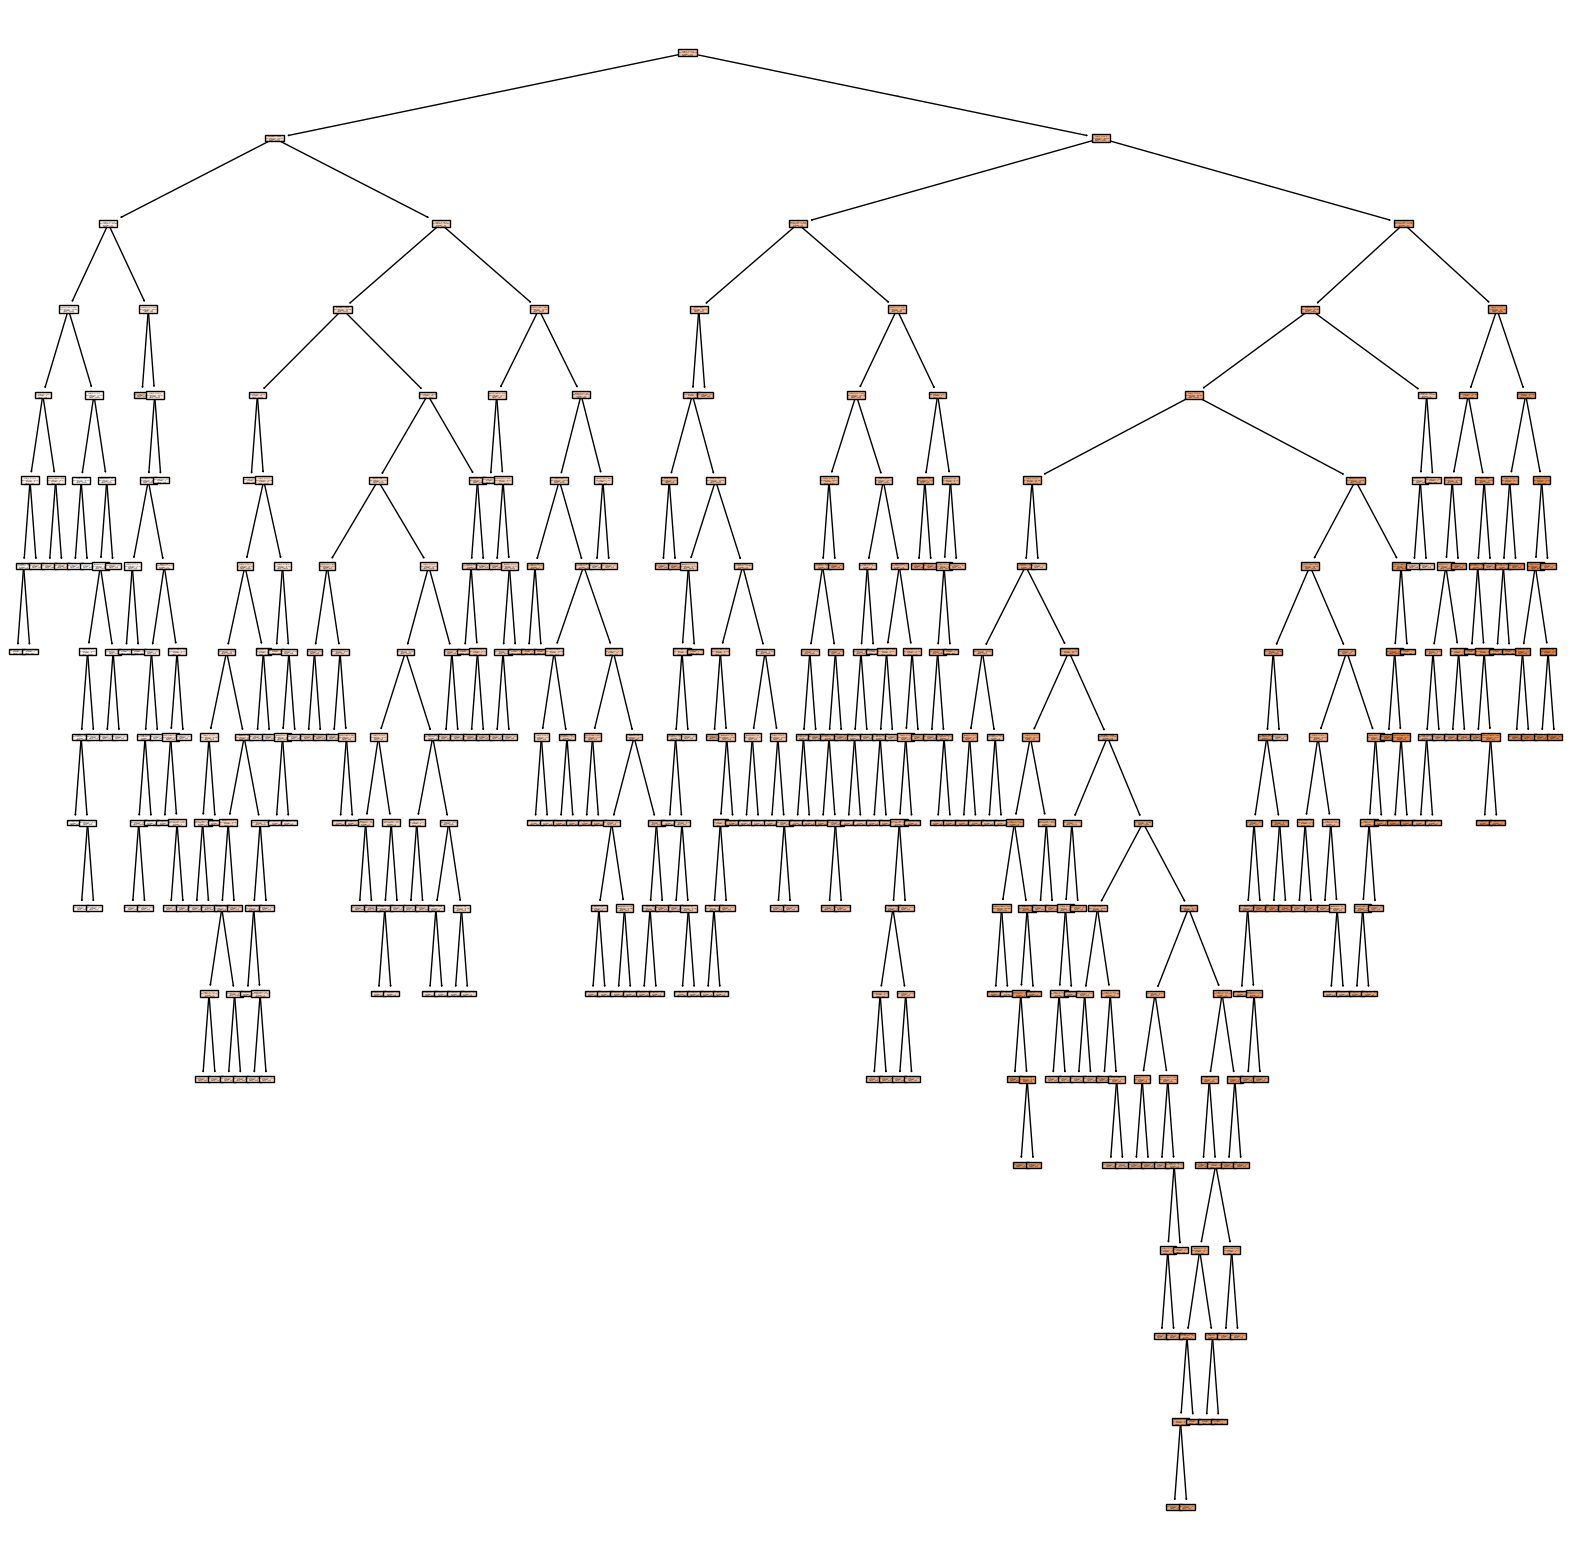

In [33]:
plt.figure(figsize=(20,20))

sklearn.tree.plot_tree(dtree, feature_names=data.columns,
                       class_names = ['actual'],
                       filled=True);

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [35]:
dtreeV2 = DecisionTreeRegressor(max_depth=3)
dtreeV2.fit(X_train, y_train)
y_preds = dtreeV2.predict(X_test)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [48]:
MAE = np.mean(abs(y_preds - y_test))
print(f"MAE: {MAE:.2f} degrees")

MAPE = np.mean(abs(y_preds-y_test)/y_test)*100
print(f"MAPE: {MAPE:.2f}%")

MAE: 4.42 degrees
MAPE: 6.94%


### Ejercicio 10

Vuelve a representar su árbol

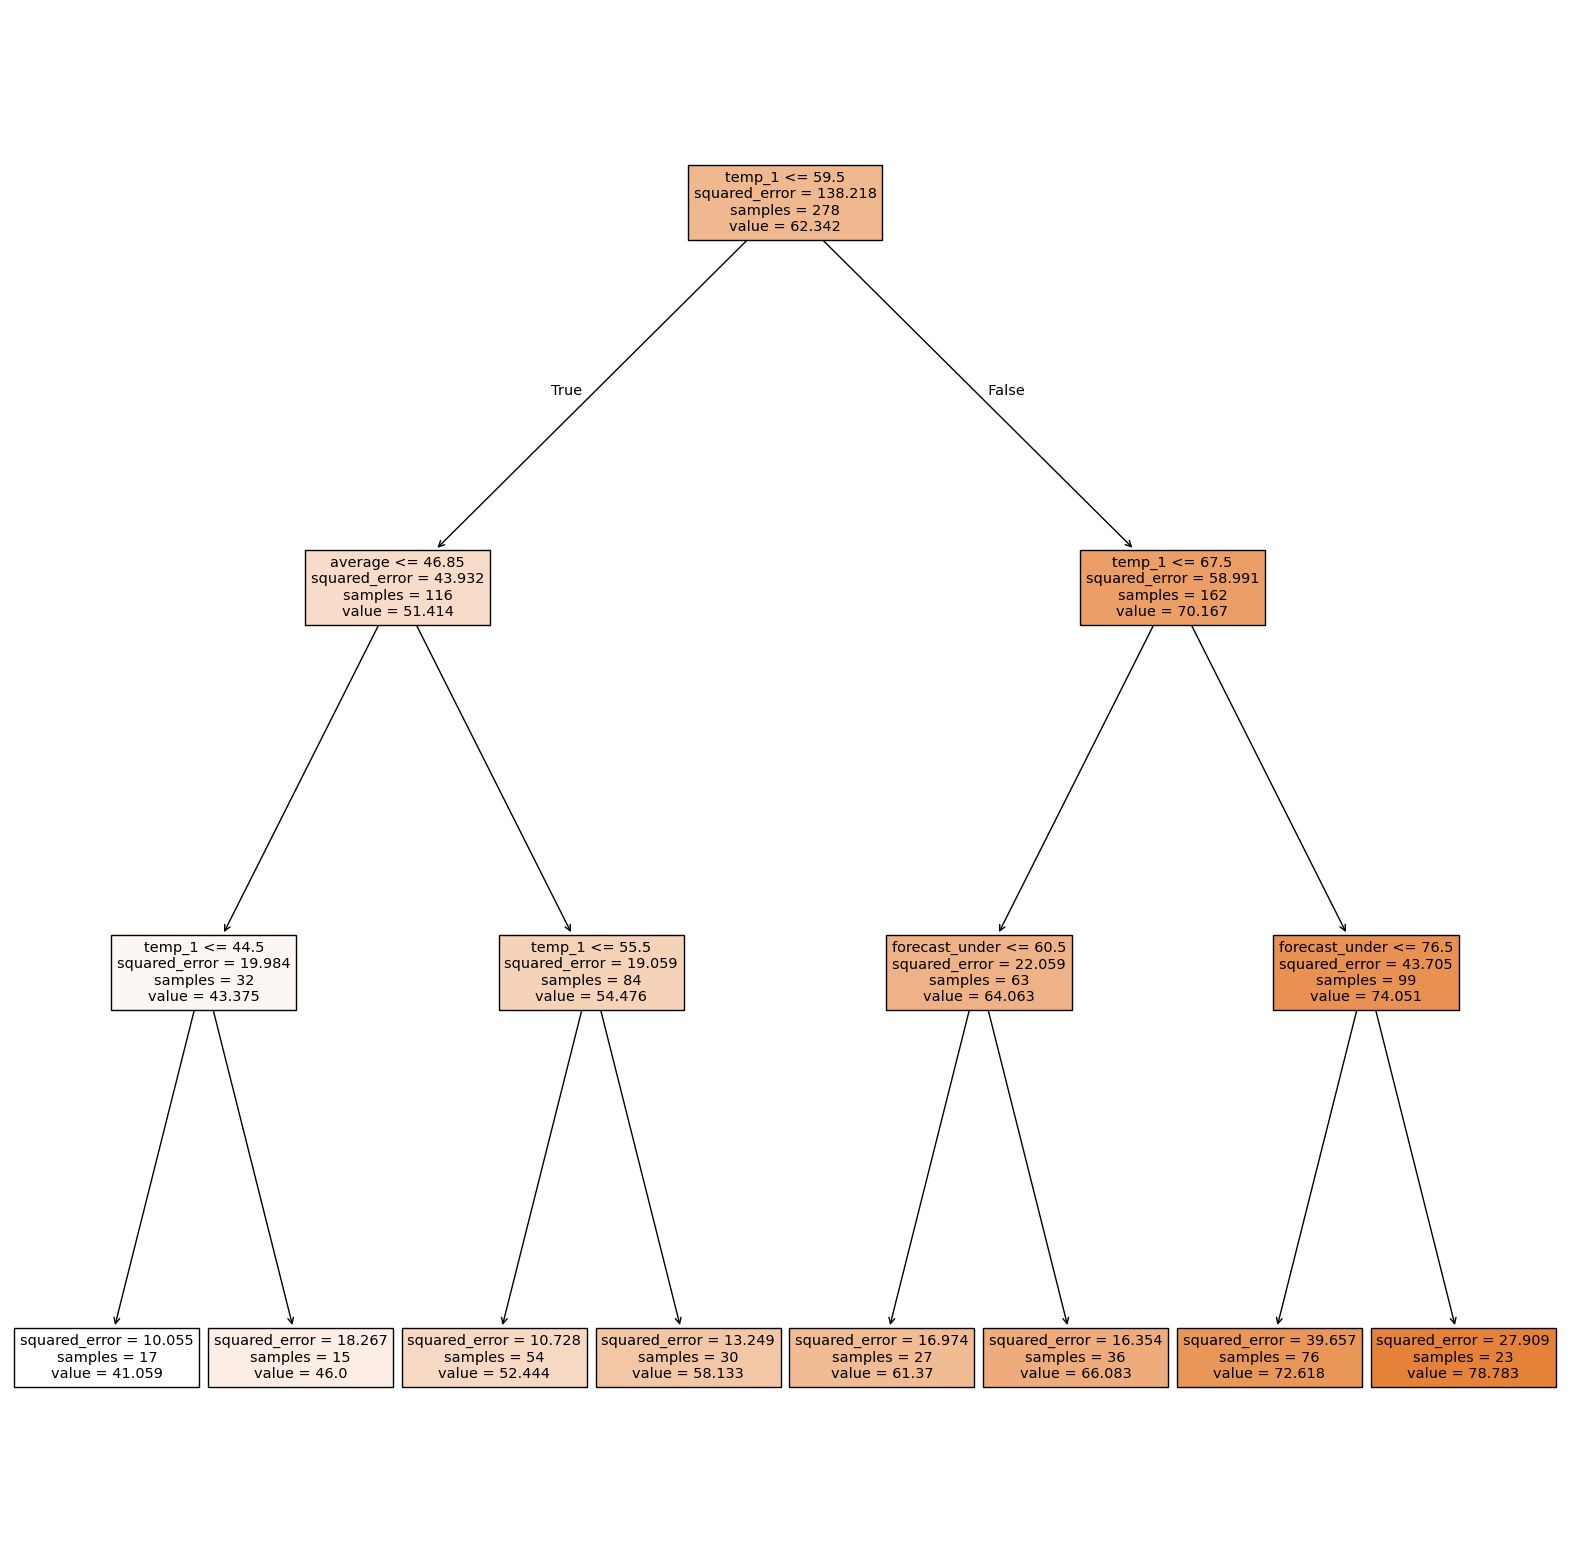

In [49]:
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(dtreeV2, feature_names=data.columns, class_names=['actual'], filled=True);

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [50]:
dtreeV2.feature_importances_

array([0.        , 0.        , 0.        , 0.88020751, 0.08841159,
       0.        , 0.        , 0.0313809 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [52]:
pd.DataFrame({'features': data.columns,
              'importance': dtreeV2.feature_importances_}).sort_values('importance',ascending=False)

,features,importance
3,temp_1,0.880208
4,average,0.088412
7,forecast_under,0.031381
0,month,0.000000
1,day,0.000000
2,temp_2,0.000000
5,forecast_noaa,0.000000
6,forecast_acc,0.000000
8,friend,0.000000
9,week_Fri,0.000000
